In [1]:
from analysis_utils import *
%load_ext autoreload
%reload_ext autoreload

import numpy as np
import pandas as pd

ptRNA = pd.read_excel('tRNAValues.xlsx',header=None)
gr04_ptRNA=ptRNA[0]
gr07_ptRNA=ptRNA[1]
gr107_ptRNA=ptRNA[2]
gr16_ptRNA=ptRNA[3]
gr25_ptRNA=ptRNA[4]

pCodon = pd.read_excel('codonValues.xlsx',header=None)
gr04_pCodon = pCodon[0]
gr07_pCodon = pCodon[1]
gr107_pCodon = pCodon[2]
gr16_pCodon = pCodon[3]
gr25_pCodon = pCodon[4]

rxndiff=dict()

In [2]:
def computeBiasedElongationLatency(biasVal=1):
    sim_time_all = list()
    sim_time_std_all = list()
    transp_time_all = list()
    rxn_time_all = list()
    pcogrib_all = list()
    
    rib_gr = [4,8,9,9,8,7]
    ptRNA = [gr07_ptRNA,gr107_ptRNA,gr16_ptRNA,gr16_ptRNA,gr25_ptRNA,gr25_ptRNA]
    pCodon =  [gr07_pCodon,gr107_pCodon,gr16_pCodon,gr16_pCodon,gr25_pCodon,gr25_pCodon]

    for i,num_rib in enumerate(rib_gr):
        weight = cognateDistrib(ptRNA[i],pCodon[i])
        sim_time_gr = list()
        sim_time_gr_var=list()
        rxn_count_gr = list()
        transp_latency_gr = list()
        rxn_latency_gr = list()
        pcogrib_gr = list()
        print(i)
        for num_tRNA in np.arange(1,25):
            sim_times=list()
            rxn_count = list()
            transp_latency = list()
            rxn_latency = list()
            N=5000
            for i in range(N):
                rxn = eventbased_sim(rib_num=num_rib,tRNA_cog=num_tRNA,repeatAllowed=True,bias=biasVal,seed=5*i)
                sim_times.append(rxn[0])
                rxn_count.append(rxn[1])
                rxn_latency.append(rxn[2])
                transp_latency.append(rxn[0]-rxn[2])

            sim_time_gr.append(np.average(sim_times))
            rxn_count_gr.append(np.average(rxn_count))
            sim_time_gr_var.append(np.std(sim_times)**2)
            pcogrib_gr.append(rxn[3])
            
            transp_latency_gr.append(np.average(transp_latency))
            rxn_latency_gr.append(np.average(rxn_latency))

        #print(np.sum(sim_time_gr*weight[1:len(sim_time_gr)+1]))
        sim_time_all.append(np.sum(sim_time_gr*weight[1:len(sim_time_gr)+1]))
        sim_time_std_all.append(np.sqrt(np.sum((sim_time_gr_var)*weight[1:len(sim_time_gr)+1]))/np.sqrt(num_tRNA*N))
        transp_time_all.append(np.sum(transp_latency_gr*weight[1:len(transp_latency_gr)+1]))
        rxn_time_all.append(np.sum(rxn_latency_gr*weight[1:len(rxn_latency_gr)+1]))
        pcogrib_all.append(np.sum(pcogrib_gr*weight[1:len(rxn_latency_gr)+1]))
        
    return sim_time_all, sim_time_std_all, transp_time_all, rxn_time_all,pcogrib_all

In [7]:
%%time
#Most up to date 12/17/20 - trying stuff out

#43
#156
#0.275
####
#8/32 = 0.25
#52.7 --> nr only
## 208
#0.254

#204.86810958409242
#52.82902819417521


#61.67005650379476
#15.526279665778466

#With exponential time included:
#7.479887302820767 ---> 10/(1000/(717/(4.7/1.4)))*7.479887302820767 --> nr
#8.717 --> 10/(1000/717)*8.71 --> non
#15.908264467912206 --> combined run

elongLatencyList = list()
elongLatency_STDlist = list()
transportLatencyList=list()
reactionLatencyList=list()
bias = np.arange(1,10.1,0.5)

for biasVal in bias:
    elongLatency, elongLatency_STD, tRNA_transport,tRNA_reaction,pcogrib = computeBiasedElongationLatency(biasVal)
    elongLatencyList.append(elongLatency)
    elongLatency_STDlist.append(elongLatency_STD)
    transportLatencyList.append(tRNA_transport)
    reactionLatencyList.append(tRNA_reaction)
    print("\n\nBias: ", biasVal, "\n", elongLatency, elongLatency_STD, "\n", tRNA_transport, "\n",tRNA_reaction,"\n",pcogrib)

0
1
2
3
4
5


Bias:  1.0 
 [55.141020648144746, 54.92576033577197, 53.695364911027724, 53.695364911027724, 53.31056584258094, 53.88883027781689] [0.20995772209584967, 0.21234967588820844, 0.2098744749887588, 0.2098744749887588, 0.20656872508675034, 0.2044934905656416] 
 [50.283661834970495, 44.87645812125916, 42.583016937953644, 42.583016937953644, 43.542832403247125, 45.26182178661661] 
 [4.857358813174258, 10.049302214512807, 11.112347973074085, 11.112347973074085, 9.7677334393338, 8.627008491200282] 
 [0.04474622213334234, 0.04546624751944261, 0.04688567903969916, 0.04688567903969916, 0.04880569966598966, 0.04880569966598966]
0
1
2
3
4
5


Bias:  1.5 
 [36.006010140912196, 35.114201823173985, 33.825985407649206, 33.825985407649206, 34.125887932938134, 34.07809020997337] [0.1401328363502221, 0.13359230029520283, 0.13271700662283342, 0.13271700662283342, 0.13014165620298382, 0.13328720998908927] 
 [33.35525978532522, 30.060476682921355, 28.35105626431769, 28.35105626431769, 29.1966673

0
1
2
3
4
5


Bias:  7.5 
 [8.009477617193262, 7.59922596919357, 7.151553958371906, 7.151553958371906, 7.443903408643389, 7.4980295937958115] [0.03206098587709326, 0.030767278801514687, 0.0287860064200413, 0.0287860064200413, 0.03008424863984037, 0.030067789687290743] 
 [6.892435207350467, 6.375216546485814, 5.936320706761679, 5.936320706761679, 6.213537813064666, 6.284646180344593] 
 [1.1170424098427951, 1.224009422707756, 1.2152332516102269, 1.2152332516102269, 1.230365595578723, 1.2133834134512171] 
 [0.22654430229918351, 0.22991235049350894, 0.23464278910248196, 0.23464278910248196, 0.24296942227041737, 0.24296942227041737]
0
1
2
3
4
5


Bias:  8.0 
 [7.595073774184369, 7.236891659760521, 6.814389412706208, 6.814389412706208, 7.092103751669465, 7.11376435821338] [0.03033265285843803, 0.029466784963614105, 0.02747787350125023, 0.02747787350125023, 0.028816706832680315, 0.02828909176340368] 
 [6.47686003204212, 6.019725703959221, 5.607918008222084, 5.607918008222084, 5.86796787218634

In [18]:
elongLatencyList = list()
elongLatency_STDlist = list()
transportLatencyList=list()
reactionLatencyList=list()
bias = np.arange(10,12.6,0.5)

for biasVal in bias:
    elongLatency, elongLatency_STD, tRNA_transport,tRNA_reaction,pcogrib = computeBiasedElongationLatency(biasVal)
    elongLatencyList.append(elongLatency)
    elongLatency_STDlist.append(elongLatency_STD)
    transportLatencyList.append(tRNA_transport)
    reactionLatencyList.append(tRNA_reaction)
    print("\n\nBias: ", biasVal, "\n", elongLatency, elongLatency_STD, "\n", tRNA_transport, "\n",tRNA_reaction,"\n",pcogrib)

0
1


KeyboardInterrupt: 

In [7]:
#old run
elongLatencyList = list()
elongLatency_STDlist = list()
transportLatencyList=list()
reactionLatencyList=list()
bias = np.arange(1,8,0.5)

for biasVal in bias:
    elongLatency, elongLatency_STD, tRNA_transport,tRNA_reaction,pcogrib = computeBiasedElongationLatency(biasVal)
    elongLatencyList.append(elongLatency)
    elongLatency_STDlist.append(elongLatency_STD)
    transportLatencyList.append(tRNA_transport)
    reactionLatencyList.append(tRNA_reaction)
    print("\n\nBias: ", biasVal, "\n", elongLatency, elongLatency_STD, "\n", tRNA_transport, "\n",tRNA_reaction,"\n",pcogrib)



Bias:  1.0 
 [37.215721172109255, 38.01854793851136, 36.11724642390144, 36.11724642390144, 36.909407789313505, 36.329348376660725] [0.11207904765504721, 0.1117731684052361, 0.10586493481132937, 0.10586493481132937, 0.10863670682158175, 0.1081525861470515] 
 [33.74284457225605, 30.79535421491456, 28.41837423120376, 28.41837423120376, 29.880803131700848, 30.348156273430067] 
 [3.4728765998532096, 7.223193723596804, 7.698872192697686, 7.698872192697686, 7.028604657612665, 5.981192103230661] 
 [0.04360248927919751, 0.044124795454265286, 0.0458232173357124, 0.0458232173357124, 0.047297877143508346, 0.047297877143508346]


Bias:  1.5 
 [24.73824138974023, 24.391610685193662, 23.28762248597301, 23.28762248597301, 23.699898932561236, 23.311441702910415] [0.07387924024128137, 0.07215670639196838, 0.06916819696918614, 0.06916819696918614, 0.07013820736102105, 0.06874499283879697] 
 [22.729068433528955, 20.687161489577235, 19.29707097354851, 19.29707097354851, 20.081721476478318, 20.15674938343

In [3]:
#1.5 36.006010140912196 33.35525978532522 2.650750355586974 0.0645362370530545

#2.5 20.690964889566583 18.23897323585892 2.451991653707661 0.10163176766929363

#4.0 12.432661982064621 10.801458116791515 1.631203865273107  0.15135985804782126

#5.0 10.101373610833413 8.688822547853192 1.4125510629802216 0.1782995132269649

#7.5 7.443903408643389 6.213537813064666 1.230365595578723 0.24296942227041737

#10 6.025134629366314 4.834037819054032 1.1910968103122828 0.2891755744976792

#Gap: [40.966656   24.29998933 13.18887822 10.26490161  7.63332267  5.25237029]

#Preloading:
preload_trans = np.array( [50.283661834970495, 44.87645812125916, 42.583016937953644, 42.583016937953644, 43.542832403247125, 45.26182178661661]  )
preload_rxn =  np.array( [4.857358813174258, 10.049302214512807, 11.112347973074085, 11.112347973074085, 9.7677334393338, 8.627008491200282]  )
preload_elong = np.array([55.141020648144746, 54.92576033577197, 53.695364911027724, 53.695364911027724, 53.31056584258094, 53.88883027781689]  )
preload_elong_sem = np.array([0.20995772209584967, 0.21234967588820844, 0.2098744749887588, 0.2098744749887588, 0.20656872508675034, 0.2044934905656416]  ) 

#Presorting+Preloading:
presortpreload_trans=np.array([ 33.35525978532522,18.23897323585892, 10.801458116791515, 8.688822547853192,6.213537813064666, 4.834037819054032])
presortpreload_rxn = np.array([ 2.650750355586974, 2.451991653707661,1.631203865273107, 1.4125510629802216, 1.230365595578723, 1.1910968103122828])
presortpreload_elong = presortpreload_trans+presortpreload_rxn
presortpreload_sem = np.array([0.1401328363502221, 0.0806555517707841, 0.04921750637308807, 0.040589519289063014, 0.03008424863984037, 0.024114695631412122])

#BM-only
bm_only_elong = np.array([297.7690828218327, 287.0317555046732, 214.16154690692883, 170.798688582851, 157.50219704468827, 135.1109224900536] )
bm_only_elong_sem = np.array([15.82499006018569, 18.932319519302787, 11.582631775363398, 8.220618561989044, 7.10059912538712, 5.863884903244429])

bm_only_trans = np.array( [241.98979332634306, 216.29638404953016, 148.7915624889631, 111.29650086910964, 101.69677914955025, 83.02328180376576]
)
bm_only_tranport_sem = np.array( [15.02609607042069, 16.78354800954726, 10.03590710312862, 7.091571679799831, 6.303865405961744, 5.155009095424843]
)

bm_only_rxn =  np.array( [55.779289495489614, 70.73537145514294, 65.36998441796574, 59.502187713741364, 55.805417895138035, 52.08764068628781]
)
bm_only_rxn_sem = np.array( [1.1653301793139563, 2.3896904099865064, 1.7394942942704879, 1.2512839939428426, 0.892753942092544, 0.7938581637983319]
)

#Bias
bias = np.array([1.5,2.5,4.0,5.0,7.5,10.0])

#Cognate binding probability
pbind = np.array([0.0645362370530545,0.10163176766929363, 0.15135985804782126,  0.1782995132269649, 0.24296942227041737, 0.2891755744976792])


87.36667733366627
1.7804192682693518
1.0596906685825602
82.44545311560375
49.07084465480462
[0.08078306 0.06696991 0.02723834 0.01575146 0.01361022 0.01038479]


NameError: name 'exptl_trans' is not defined

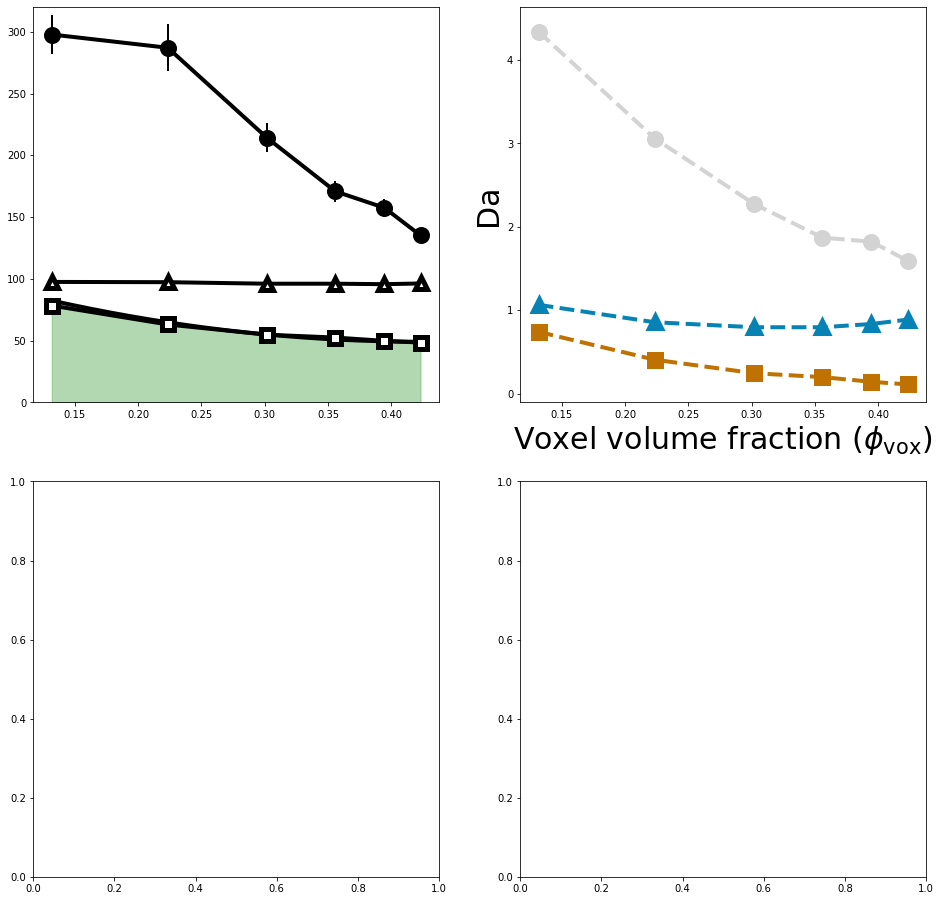

In [5]:
import matplotlib.pyplot as plt
fig,[[ax,ax2],[ax3,ax4]]= plt.subplots(2,2,figsize=(16,16))


phi_list = np.array([0.13172292, 0.22350473, 0.30181037, 0.35583449, 0.3945994 ,
       0.42317604])

###Experimental
x=np.array([0.13172292, 0.22350473, 0.30181037, 0.35583449, 0.3945994 ,
       0.42317604])
y_model,SS_err,_,_,_ = np.polyfit(x,[1000/12,1000/16,1000/18,1000/19,1000/20,1000/21],2,full=True)
y_hat = np.polyval(y_model,x)
x_sweep_i = np.linspace(min(x),max(x),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,marker='o',markersize=0,markeredgewidth=5,markevery=199,linewidth=4,color='black')
ax.fill_between(x_sweep_i, y_hat_sweep_i, 0*y_hat_sweep_i, color='green',alpha=0.3)


#####Brownian motion only
ax.errorbar(x,bm_only_elong,bm_only_elong_sem,marker='o',markersize=12,markeredgewidth=5,zorder=4,linewidth=4,elinewidth=2,color='black',alpha=1)
ax.set_ylim(0,320)
######Preload
ax.errorbar(x, preload_elong+np.array([1000/1475+1000/1529+1000/209+1000/200+1000/32]),preload_elong_sem,zorder=1,marker='^',markersize=12,markeredgewidth=5,linewidth=4,elinewidth=2,alpha=1,mfc='white',color='black')

print((45+1000/1475+1000/1529+1000/209+1000/200+1000/32))
print((45+1000/1475+1000/1529+1000/209+1000/200+1000/32)/y_hat_sweep_i[-1])
print((45+1000/1475+1000/1529+1000/209+1000/200+1000/32)/y_hat_sweep_i[0])
print(y_hat_sweep_i[0])

print(y_hat_sweep_i[-1])

######Preload + Presort
ax.errorbar(x,presortpreload_elong+np.array([1000/1475+1000/1529+1000/209+1000/200+1000/32]),presortpreload_sem,zorder=4,marker='s',markersize=12,markeredgewidth=5,linewidth=4,elinewidth=2,mfc='white',color='black',alpha=1)

##### Plot Da (Subplot 4) ######
##Plot Damkohler number predicted by our simulation

bm_Da_var = (bm_only_trans**2/bm_only_rxn**2)*(bm_only_tranport_sem**2/bm_only_trans**2+bm_only_rxn_sem**2/bm_only_rxn**2)
print(bm_Da_var)
ax2.errorbar(phi_list,bm_only_trans/bm_only_rxn,bm_Da_var,marker='o',markersize=12,markeredgewidth=5,zorder=1,linewidth=4,elinewidth=2,linestyle='dashed',color='lightgray')
ax2.set_xlabel('Voxel volume fraction $(\phi_{\mathrm{vox}})$',size=30,color='black')
ax2.set_ylabel('Da',fontsize=30)

## Plot pre-load Da
ax2.errorbar(phi_list, preload_trans/(preload_rxn+(1000/1475+1000/1529+1000/209+1000/200+1000/32)),0,marker='^',markersize=12,markeredgewidth=5,zorder=2,linewidth=4,elinewidth=2,linestyle='dashed',color='#0683b4')

### Plot pre-sort+pre-load Da
ax2.errorbar(phi_list, presortpreload_trans/(presortpreload_rxn+(1000/1475+1000/1529+1000/209+1000/200+1000/32)),0,marker='s',markersize=12,markeredgewidth=5,zorder=2,linewidth=4,elinewidth=2,linestyle='dashed',color='#bf7200')


#Plot inferred experimental values of Damkohler number (using data from literature)
ax2.plot(x_sweep_i,exptl_trans/exptl_rxn,marker='o',markersize=0,markeredgewidth=5,markevery=199,linewidth=4,color='black',label='Empirical bulk elongation')
ax2.fill_between(x_sweep_i, exptl_trans/exptl_rxn, 0*y_hat_sweep_i,edgecolor='black',alpha=0.3,facecolor='green')


ax.set_ylabel(r'Elongation latency (ms)',size=30,color='black')
ax2.set_ylabel(r'Da',size=30,color='black')
for ax in [ax,ax2,ax3,ax4]:
    
    ax1 = ax.twiny()
    ax1.set_xlim(0.11,0.44)
    ax1.tick_params(axis='both', which='major',width=4, labelsize=20)
    #ax1.scatter(x_sweep_i,y_hat_sweep_i)
    ax1.set_xticks(x)
    ax1.set_xlabel('Growth rate (dbl/hr)',size=30,color='black',labelpad=15)
    labels = [item.get_text() for item in ax1.get_xticklabels()]
    labels = ['0.6','1.0','1.5','2.0','2.5','3.0']
    ax1.set_xticklabels(labels)
    #ax.set_ylim(0,300)
    
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlim(0.11,0.44)
    ax.set_xticks(np.arange(0.15,0.41,0.05))

    ax.set_xlabel(r'Voxel volume fraction $(\phi_{\mathrm{vox}})$',size=30,color='black')


plt.tight_layout(pad=4.0)

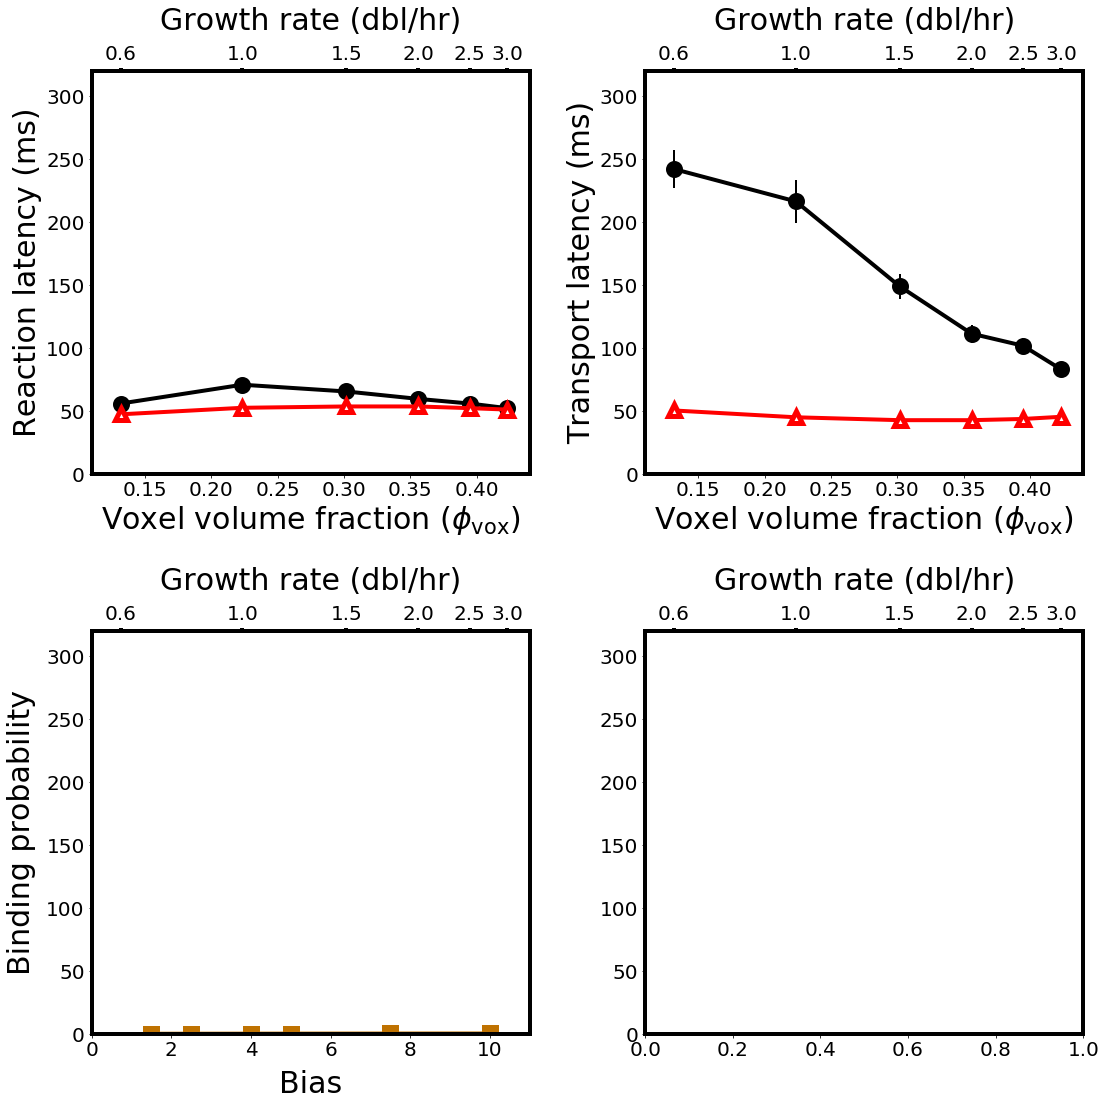

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

phi_list = np.array([0.13172292, 0.22350473, 0.30181037, 0.35583449, 0.3945994 ,
       0.42317604])

##### Plot bias
fig, [[ax,ax1],[ax2,ax3]] = plt.subplots(2,2,figsize=(16,16))
ax2.errorbar(bias,pbind,0,zorder=2,marker='s',color='#bf7200',markersize=12,elinewidth=2,linewidth=4,markeredgewidth=5)
ax2.set_xlabel('Bias', size=30,labelpad=10)
ax2.set_ylabel('Binding probability', size=30,labelpad=10)
ax2.set_xlim(0,11)

### Plot reaction (BM vs. preload vs. preload-presort)

ax.errorbar(phi_list,bm_only_rxn,bm_only_rxn_sem,marker='o',markersize=12,markeredgewidth=5,zorder=1,linewidth=4,elinewidth=2,color='black')
ax.errorbar(phi_list,preload_rxn+(1000/1475+1000/1529+1000/209+1000/200+1000/32),zorder=3,marker='^',color='red',mfc='white',markersize=12,elinewidth=2,linewidth=4,markeredgewidth=5)
#ax.errorbar(phi_list,presortpreload_rxn+(1000/1475+1000/1529+1000/209+1000/200+1000/32),zorder=3,marker='s',color='#bf7200',markersize=12,elinewidth=2,linewidth=4,markeredgewidth=5,linestyle='dashed')

ax.set_xticks(np.arange(0.15,0.43,0.05))
ax.set_xlim(0.11,0.44)
ax.set_xlabel('Voxel volume fraction $(\phi_{\mathrm{vox}})$',size=30,color='black')
ax.set_ylabel('Reaction latency (ms)',fontsize=30)

#Plot inferred experimental values of reaction latency (using data from literature)
y_model,SS_err,_,_,_ = np.polyfit(phi_list,[1000/1475+1000/1529+1000/209+1000/200+1000/32]*len(phi_list),2,full=True)
y_hat = np.polyval(y_model,phi_list)
x_sweep_i = np.linspace(min(phi_list),max(phi_list),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
#ax.plot(x_sweep_i,y_hat_sweep_i,marker='o',zorder=1,markersize=0,markeredgewidth=5,markevery=199,linewidth=4,color='black')
#ax.fill_between(x_sweep_i, y_hat_sweep_i, 0*y_hat_sweep_i, color='green',alpha=0.3)
exptl_rxn = y_hat_sweep_i

### Plot transport (BM vs. preload vs. preload-presort)

ax1.errorbar(phi_list,bm_only_trans,bm_only_tranport_sem,marker='o',markersize=12,markeredgewidth=5,zorder=1,linewidth=4,elinewidth=2,color='black')
ax1.errorbar(phi_list,preload_trans,0,zorder=3,marker='^',color='red',mfc='white',markersize=12,elinewidth=2,linewidth=4,markeredgewidth=5)
#ax1.errorbar(phi_list,presortpreload_trans,0,zorder=3,marker='s',color='#bf7200',markersize=12,elinewidth=2,linewidth=4,markeredgewidth=5,linestyle='dashed')

ax1.set_xticks(np.arange(0.15,0.43,0.05))
ax1.set_xlim(0.11,0.44)
ax1.set_xlabel('Voxel volume fraction $(\phi_{\mathrm{vox}})$',size=30,color='black')
ax1.set_ylabel('Transport latency (ms)',fontsize=30)


#Plot inferred experimental values of transport latency (using data from literature)
y_model,SS_err,_,_,_ = np.polyfit(phi_list,np.subtract([1000/12,1000/16,1000/18,1000/19,1000/20,1000/21],(1000/1475+1000/1529+1000/209+1000/200+1000/32)),2,full=True)
y_hat = np.polyval(y_model,phi_list)
x_sweep_i = np.linspace(min(phi_list),max(phi_list),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
#ax1.plot(x_sweep_i,y_hat_sweep_i,marker='o',zorder=1,markersize=0,markeredgewidth=5,markevery=199,linewidth=4,color='black',label='Empirical bulk elongation')
#ax1.fill_between(x_sweep_i, y_hat_sweep_i, 0*y_hat_sweep_i,edgecolor='black',alpha=0.3,facecolor='green')
exptl_trans = y_hat_sweep_i



for _,axes in enumerate([ax,ax1,ax2,ax3]):
    axes.spines['left'].set_linewidth(4)
    axes.spines['bottom'].set_linewidth(4)
    axes.spines['top'].set_linewidth(4)
    axes.spines['right'].set_linewidth(4)
    axes.tick_params(axis='both', which='major', labelsize=20)


    ax1 = axes.twiny()
    ax1.set_xlim(0.11,0.44)
    ax1.tick_params(axis='both', which='major',width=4, labelsize=20)
    ax1.set_xticks(phi_list)
    ax1.set_xlabel('Growth rate (dbl/hr)',size=30,color='black',labelpad=15)
    labels = [item.get_text() for item in ax1.get_xticklabels()]
    labels = ['0.6','1.0','1.5','2.0','2.5','3.0']
    ax1.set_xticklabels(labels)
    ax1.set_ylim(0,320)
    ax.set_ylim(0,320)


plt.tight_layout(pad=3.0)
